## Bibliotecas

In [1]:
#Bibliotecas
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from bcb import sgs


## Get da série no SGS/BACEN

In [2]:
#Buscar as séries no SGS
series = sgs.get({'Florianópolis':7484,
                 'Porto Alegre': 7489,
                 'Curitiba':7483,
                 'IPCA':433}, start = '2020-01-01')


In [4]:
# ver o dataframe
series.head() 

,Florianópolis,Porto Alegre,Curitiba,IPCA
Date,,,,
2020-01-01,489.13,502.98,452.32,0.21
2020-02-01,493.15,492.83,447.91,0.25
2020-03-01,517.13,497.88,465.47,0.07
2020-04-01,523.80,527.01,511.23,-0.31
2020-05-01,524.07,518.63,531.27,-0.38


## Tratamento dos dados

In [5]:
# Criar a variação
series['base100'] =  ((series['IPCA']/100)+1) 
series.head()

,Florianópolis,Porto Alegre,Curitiba,IPCA,base100
Date,,,,,
2020-01-01,489.13,502.98,452.32,0.21,1.0021
2020-02-01,493.15,492.83,447.91,0.25,1.0025
2020-03-01,517.13,497.88,465.47,0.07,1.0007
2020-04-01,523.80,527.01,511.23,-0.31,0.9969
2020-05-01,524.07,518.63,531.27,-0.38,0.9962


In [6]:
# Criar o índice
series['IPCA_Acumulado'] =  series['base100'].cumprod()
series.tail()

,Florianópolis,Porto Alegre,Curitiba,IPCA,base100,IPCA_Acumulado
Date,,,,,,
2022-02-01,707.56,695.91,652.90,1.01,1.0101,1.168222
2022-03-01,745.47,734.28,701.59,1.62,1.0162,1.187147
2022-04-01,788.00,780.86,739.28,1.06,1.0106,1.199731
2022-05-01,772.07,768.76,713.68,0.47,1.0047,1.205369
2022-06-01,760.41,754.19,701.26,0.67,1.0067,1.213445


In [7]:
# Criar as colunas deflacionadas

series['Florianópolis Deflacionado'] = series['Florianópolis'] / series['IPCA_Acumulado']
series['Porto Alegre Deflacionado'] = series['Porto Alegre'] / series['IPCA_Acumulado']
series['Curitiba Deflacionado'] = series['Curitiba'] / series['IPCA_Acumulado']
series.head()

,Florianópolis,Porto Alegre,Curitiba,IPCA,base100,IPCA_Acumulado,Florianópolis Deflacionado,Porto Alegre Deflacionado,Curitiba Deflacionado
Date,,,,,,,,,
2020-01-01,489.13,502.98,452.32,0.21,1.0021,1.002100,488.104980,501.925955,451.372119
2020-02-01,493.15,492.83,447.91,0.25,1.0025,1.004605,490.889332,490.570799,445.856718
2020-03-01,517.13,497.88,465.47,0.07,1.0007,1.005308,514.399325,495.250973,463.012112
2020-04-01,523.80,527.01,511.23,-0.31,0.9969,1.002192,522.654333,525.857312,510.111826
2020-05-01,524.07,518.63,531.27,-0.38,0.9962,0.998384,524.918432,519.469625,532.130088


In [8]:
# Filtrar para apenas colunas deflacionadas

series_subset = series.copy()
series_subset.drop(['Florianópolis','Porto Alegre','Curitiba','IPCA','base100','IPCA_Acumulado'], axis=1, inplace=True)
series_subset.head()

,Florianópolis Deflacionado,Porto Alegre Deflacionado,Curitiba Deflacionado
Date,,,
2020-01-01,488.104980,501.925955,451.372119
2020-02-01,490.889332,490.570799,445.856718
2020-03-01,514.399325,495.250973,463.012112
2020-04-01,522.654333,525.857312,510.111826
2020-05-01,524.918432,519.469625,532.130088


## Dataviz

In [28]:
# formatação condicional por cores
series_subset.style.highlight_max().background_gradient().set_caption("Gradiente de preços").format(
    {"Florianópolis Deflacionado" : "{:,.2f}",
     "Porto Alegre Deflacionado" : "{:,.2f}",
     "Curitiba Deflacionado" : "{:,.2f}"})

,Florianópolis Deflacionado,Porto Alegre Deflacionado,Curitiba Deflacionado
Date,,,
2020-01-01 00:00:00,488.10,501.93,451.37
2020-02-01 00:00:00,490.89,490.57,445.86
2020-03-01 00:00:00,514.40,495.25,463.01
2020-04-01 00:00:00,522.65,525.86,510.11
2020-05-01 00:00:00,524.92,519.47,532.13
2020-06-01 00:00:00,516.46,511.90,505.54
2020-07-01 00:00:00,519.65,508.89,523.74
2020-08-01 00:00:00,526.74,524.94,502.03
2020-09-01 00:00:00,574.68,545.53,517.30


In [33]:
# Quadro descritivo

series_subset.describe().round(2)

,Florianópolis Deflacionado,Porto Alegre Deflacionado,Curitiba Deflacionado
count,30.00,30.00,30.00
mean,580.80,574.79,537.35
std,45.75,44.41,39.28
min,488.10,490.57,445.86
25%,538.07,530.78,517.08
50%,594.17,591.34,542.83
75%,605.61,600.07,563.18
max,656.81,650.86,616.20


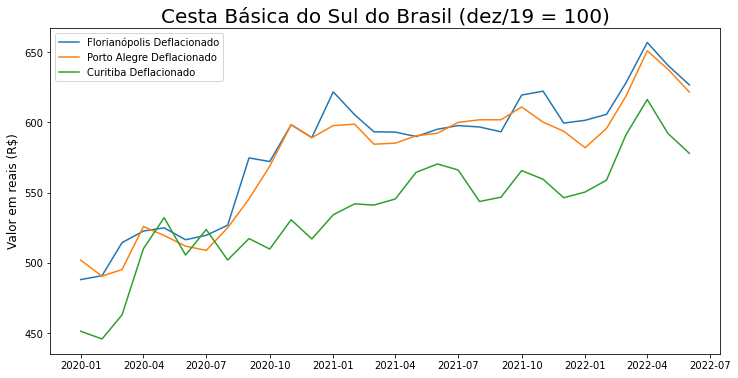

In [21]:
# plotagem 
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(series_subset)
ax.set_title('Cesta Básica do Sul do Brasil (dez/19 = 100)', fontsize=20)
ax.set_ylabel('Valor em reais (R$)', fontsize=12)
ax.grid(False)
ax.legend(series_subset.columns)
plt.show()